In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

### Get image
* gray scale (0 channel because easy to train)
* normalize data between 0-1
* shuffle

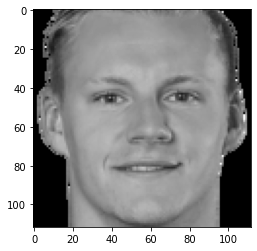

In [7]:
path_dir = '5-project\dataset\cropped'
class_name = ['leno','ramsdale','saka','smith_rowe','tavares']

for name in class_name :
    path = os.path.join(path_dir,name)
    for image in os.listdir(path):
        image_path = os.path.join(path_dir,name,image)
        img_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [8]:
img_array.shape

(112, 112)

In [15]:
img_array[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 104, 100,
       131,  75,  46,  82, 119,  83,  30,  38,  83,  93,  80,  79,  84,
       100,  99,  95, 100, 115, 132, 123, 131, 137, 143, 147, 139, 141,
       148, 138, 121, 131, 128, 129, 115, 111, 122, 127, 131, 129, 117,
       125, 111, 126, 137, 121, 116, 115, 141, 135, 119, 101,  99, 114,
        98, 116, 109,  96, 108, 113, 107, 114, 128, 144, 127, 126, 127,
       123, 115, 114, 127, 126, 132, 145, 115, 132,  79,  68,  77,  71,
        58,  66,  76,  87,  81,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [16]:
train_data = []

def creat_data():
    for name in class_name :
        path = os.path.join(path_dir,name)
        to_number = class_name.index(name)
        for image in os.listdir(path):
            image_path = os.path.join(path_dir,name,image)
            
            try:
                img_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (50,50))
                new_array = new_array/255.
                train_data.append([new_array,to_number])
            except Exception as e :
                print(e)
creat_data()

In [37]:
len(train_data) # we have 119 images

119

In [41]:
class_name

['leno', 'ramsdale', 'saka', 'smith_rowe', 'tavares']

In [53]:
print(len(train_data[0])) # with 0 is image arr, and 1 is labels
print(train_data[0][0])
print(train_data[0][1])

2
[[0.09019608 0.44313725 0.26666667 ... 0.4        0.49803922 0.35686275]
 [0.10196078 0.25098039 0.2745098  ... 0.36862745 0.45490196 0.57254902]
 [0.21960784 0.3254902  0.24313725 ... 0.34509804 0.49019608 0.2627451 ]
 ...
 [0.37254902 0.35294118 0.37647059 ... 0.32156863 0.33333333 0.28235294]
 [0.43921569 0.45882353 0.45490196 ... 0.34901961 0.33333333 0.3254902 ]
 [0.49019608 0.51372549 0.47843137 ... 0.34117647 0.30980392 0.30588235]]
0


Text(0.5, 1.0, 'ramsdale')

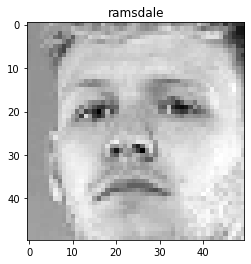

In [35]:
plt.imshow(train_data[24][0],cmap='gray')
plt.title(class_name[train_data[24][1]])

it's have same classes we must shuffle them

In [47]:
for sample in train_data[:10] :
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


Shuffle

In [48]:
import random
random.shuffle(train_data)

In [50]:
# it's shuffle!
for sample in train_data[:10] :
    print(sample[1])

0
0
1
0
0
1
1
0
2
4


save to x and y

In [54]:
X = []
y = []

In [55]:
for features,labels in train_data :
    X.append(features)
    y.append(labels)


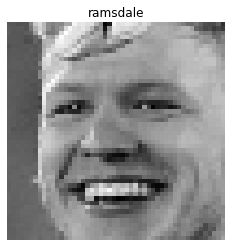

In [77]:
plt.imshow(X[117],cmap='gray')
plt.title(class_name[y[117]])
plt.axis('off')
plt.show()

### What is reshape with -1

Now we want to reshape to 5 X 5 x 8:

In [129]:
r = np.random.rand(2, 10, 10) 
print(r.shape)
print(np.reshape(r, (5, 5, 8)).shape )

(2, 10, 10)
(5, 5, 8)


Note that, once you fix first dim = 5 and second dim = 5, you don't need to determine third dimension. To assist your laziness, Numpy gives the option of using -1:

In [139]:
print(np.reshape(r,(-1, 5, 20)).shape) # 2*5*20 = 5*5*8
print(np.reshape(r,(50, -1)).shape) # 50*4 = 2*5*20 = 5*5*8

(2, 5, 20)
(50, 4)


In [99]:
a = np.array(X).reshape(-1,50,50)
a.shape
a[0].shape

(50, 50)

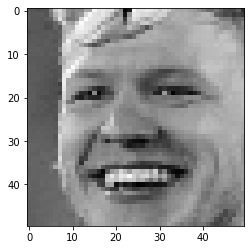

In [98]:
plt.imshow(a[117],cmap='gray')

### Save data
* to numoy array

In [102]:
X = np.array(X).reshape(-1,50,50)

In [104]:
y = np.array(y).reshape(-1,)

In [107]:
y

array([0, 0, 1, 0, 0, 1, 1, 0, 2, 4, 3, 0, 1, 3, 2, 3, 3, 0, 3, 1, 4, 1,
       2, 3, 3, 0, 1, 3, 4, 3, 4, 0, 4, 2, 4, 4, 3, 4, 0, 3, 4, 1, 4, 3,
       1, 4, 4, 3, 4, 0, 1, 3, 4, 0, 2, 3, 2, 3, 4, 0, 1, 1, 4, 2, 4, 3,
       0, 3, 3, 1, 0, 3, 3, 0, 1, 2, 4, 0, 1, 2, 2, 1, 2, 0, 1, 3, 3, 4,
       4, 4, 3, 3, 1, 3, 4, 0, 0, 1, 4, 4, 1, 3, 1, 3, 1, 2, 0, 0, 0, 4,
       3, 0, 4, 3, 2, 4, 3, 1, 4])

In [116]:
np.save('x5-arsenal.npy',X)
np.save('y5-arsenal.npy',y)

In [120]:
c = np.load('x5-arsenal.npy')
c.shape

(119, 50, 50)

In [121]:
import json
with open('5-arsenal-classes-label','w') as f:
    f.write(json.dumps(class_name))